In [ ]:
from numpy import *
import matplotlib.pyplot as plt
from collections import defaultdict
import json
import os
from scipy.stats import gmean


baseline_mode = 'level_3'
baseline_data_path = 'sample_baseline_data'
exp_data_path = "sample_exp_data"

if not os.path.exists('figures'):
    os.makedirs('figures')


: 

In [10]:
chiplet_array_dim = (3,3)
structure='square'
chiplet_sizes=[(6,6),(7,7),(8,8),(9,9)]
sparsity = None

exp_depth_data = defaultdict(list)
exp_on_chip_data = defaultdict(list)
exp_cross_chip_data = defaultdict(list)
exp_meas_num_data = defaultdict(list)  
exp_shuttle_num_data = defaultdict(list)
baseline_depth_data = defaultdict(list)
baseline_on_chip_data = defaultdict(list)
baseline_cross_chip_data = defaultdict(list) 
main_table = defaultdict(dict)

for chip_size in chiplet_sizes:
    additional_comment = ''
    if sparsity is not None:
        additional_comment = '_sparsity{}'.format(sparsity)
    baseline_mode_comment = ''
    if baseline_mode == 'level_3':
        baseline_mode_comment = '_level_3'

    s = '_'.join([s[:3] for s in structure.split('_')])
    baseline_file_name = "{}{}{}{}{}{}{}.json".format(s, chiplet_array_dim[0], chiplet_array_dim[1], chip_size[0], chip_size[1], additional_comment, baseline_mode_comment)
    exp_file_name = "{}{}{}{}{}{}.json".format(s, chiplet_array_dim[0], chiplet_array_dim[1], chip_size[0], chip_size[1], additional_comment)
    baseline_file_path = os.path.join(baseline_data_path, baseline_file_name)
    exp_file_path = os.path.join(exp_data_path, exp_file_name)

    with open(exp_file_path, 'r') as json_file:
        print(exp_file_path)
        exp_data = json.load(json_file)
    for b, data in exp_data.items():
        exp_depth_data[b].append(data['depth'])
        exp_on_chip_data[b].append(data['on-chip'])
        exp_cross_chip_data[b].append(data['cross-chip'])
        exp_meas_num_data[b].append(data['meas_num'])


    with open(baseline_file_path, 'r') as json_file:
        baseline_data = json.load(json_file)[baseline_mode]
        print(baseline_file_path)
    for b, data in baseline_data.items():
        baseline_depth_data[b].append(data['depth'])
        baseline_on_chip_data[b].append(data['on-chip'])
        baseline_cross_chip_data[b].append(data['cross-chip'])

# Print the loaded dictionary
print("Loaded dictionary:", exp_data)
print("Loaded dictionary:", baseline_data)
print(exp_depth_data, baseline_depth_data)

sample_exp_data/squ3366.json
sample_baseline_data/squ3366_level_3.json
sample_exp_data/squ3377.json
sample_baseline_data/squ3377_level_3.json
sample_exp_data/squ3388.json
sample_baseline_data/squ3388_level_3.json
sample_exp_data/squ3399.json
sample_baseline_data/squ3399_level_3.json
Loaded dictionary: {'vqe': {'depth': 21687, 'eff_gate_num': 1296845.8, 'on-chip': 1132645, 'cross-chip': 6789, 'meas_num': 51801, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 629, 'sparsity': 1}, 'qft': {'depth': 24138, 'eff_gate_num': 1511567.5999999999, 'on-chip': 1346335, 'cross-chip': 6833, 'meas_num': 52122, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 629, 'sparsity': 1}, 'qaoa': {'depth': 19115, 'eff_gate_num': 914799.6, 'on-chip': 755061, 'cross-chip': 6593, 'meas_num': 50432, 'weight': [7.4, 2.2], 'periods': [13, 2], 'shuttle_num': 628, 'sparsity': 1}, 'bv': {'depth': 40, 'eff_gate_num': 2612.0, 'on-chip': 2111, 'cross-chip': 24, 'meas_num': 147, 'weight': [7.4, 2.2], 'perio

In [11]:
cross_chip_weight = 7.4
meas_weight = 2.2
improvement_data = defaultdict(dict)
for b in exp_data.keys():
    for i, chip_size in enumerate(chiplet_sizes):
        exp_depth = exp_depth_data[b][i]
        baseline_depth = baseline_depth_data[b][i]
        main_table[chip_size][b] = ['{:,.0f}'.format(baseline_depth), '{:,.0f}'.format(exp_depth), '{:.1f}\%'.format(100*(1 - exp_depth / baseline_depth))]
        improvement_data[chip_size][b] = [1 - exp_depth / baseline_depth]
        
        exp_eff_cnot = exp_on_chip_data[b][i] + cross_chip_weight * exp_cross_chip_data[b][i] + meas_weight * exp_meas_num_data[b][i]
        baseline_eff_cnot = baseline_on_chip_data[b][i] + cross_chip_weight * baseline_cross_chip_data[b][i]
        main_table[chip_size][b] += ['{:,.0f}'.format(baseline_eff_cnot), '{:,.0f}'.format(exp_eff_cnot), '{:.1f}\%'.format(100*(1 - exp_eff_cnot / baseline_eff_cnot),)]
        improvement_data[chip_size][b] += [1 - exp_eff_cnot / baseline_eff_cnot]
for chip_size in chiplet_sizes:
    for b in ['qft', 'qaoa', 'vqe', 'bv']:
        print(chip_size, b, '  &  '.join([str(s) for s in main_table[chip_size][b]]))
    print('\n')

depth_imprv_list = []
cnot_imprv_list = []
for chip_size in chiplet_sizes:
    for b in ['qft', 'qaoa', 'vqe', 'bv']:
        print(chip_size, b, improvement_data[chip_size][b])
        depth_imprv_list.append(improvement_data[chip_size][b][0])
        cnot_imprv_list.append(improvement_data[chip_size][b][1])

print(gmean(depth_imprv_list), gmean(cnot_imprv_list))

(6, 6) qft 19,282  &  7,504  &  61.1\%  &  325,236  &  216,771  &  33.3\%
(6, 6) qaoa 14,837  &  6,586  &  55.6\%  &  201,637  &  151,120  &  25.1\%
(6, 6) vqe 15,725  &  6,784  &  56.9\%  &  261,286  &  180,044  &  31.1\%
(6, 6) bv 418  &  31  &  92.6\%  &  1,179  &  960  &  18.6\%


(7, 7) qft 32,086  &  11,189  &  65.1\%  &  582,500  &  451,553  &  22.5\%
(7, 7) qaoa 22,757  &  9,735  &  57.2\%  &  389,773  &  300,847  &  22.8\%
(7, 7) vqe 26,277  &  10,181  &  61.3\%  &  471,148  &  385,647  &  18.1\%
(7, 7) bv 597  &  34  &  94.3\%  &  1,711  &  1,415  &  17.3\%


(8, 8) qft 57,143  &  18,028  &  68.5\%  &  1,048,824  &  827,653  &  21.1\%
(8, 8) qaoa 43,478  &  14,175  &  67.4\%  &  716,324  &  507,897  &  29.1\%
(8, 8) vqe 47,193  &  16,512  &  65.0\%  &  854,935  &  690,826  &  19.2\%
(8, 8) bv 823  &  37  &  95.5\%  &  2,297  &  1,784  &  22.3\%


(9, 9) qft 90,535  &  24,138  &  73.3\%  &  1,673,337  &  1,511,568  &  9.7\%
(9, 9) qaoa 66,342  &  19,115  &  71.2\%  &  1,171,59

defaultdict(<class 'list'>, {'vqe': [0.568590542568616, 0.6125509000266393, 0.6501161194080454, 0.7115238807201062], 'qft': [0.6108287522041282, 0.6512831061328546, 0.6845107887230282, 0.7333848787761639], 'qaoa': [0.5561157091634541, 0.572215777262181, 0.673970044344674, 0.7118726843547546], 'bv': [0.9258018190521781, 0.943029490616622, 0.9550643672577119, 0.9623706491063029]})


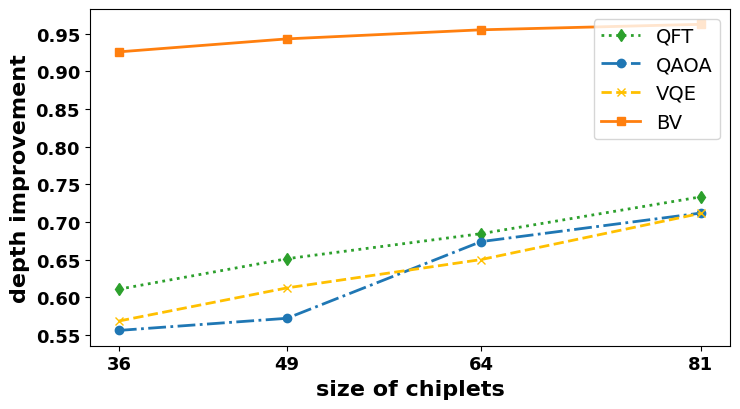

defaultdict(<class 'list'>, {'vqe': [0.3109291528172068, 0.1814741789123525, 0.19195489903796215, 0.05391510072092498], 'qft': [0.3334948572665476, 0.22480105399528405, 0.21087494689766217, 0.09667459884165819], 'qaoa': [0.25053655741903347, 0.2281484575396885, 0.29096693880247326, 0.21918575138672258], 'bv': [0.18558485187824514, 0.17278466214636445, 0.2234564891875893, 0.057584066964930125]})


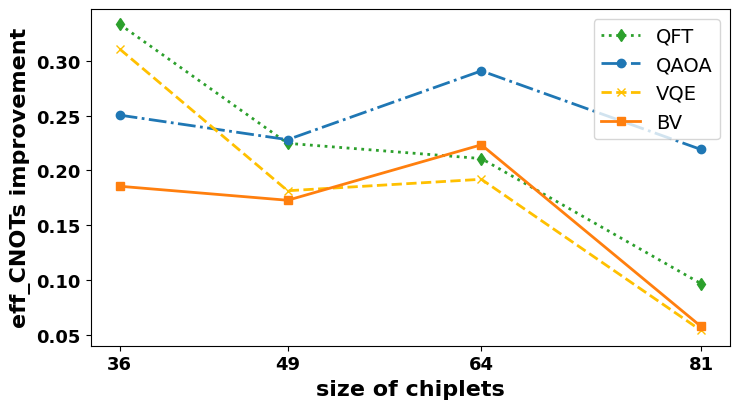

In [12]:
def draw_improvement(depth_or_cnots):
    cross_chip_weight = 7.4
    meas_weight = 2.2
    draw_data = defaultdict(list)
    for b in exp_data.keys():
        for i, chip_size in enumerate(chiplet_sizes):
            if depth_or_cnots == 'depth':
                exp_depth = exp_depth_data[b][i]
                baseline_depth = baseline_depth_data[b][i]
                draw_data[b].append(1 - exp_depth / baseline_depth)
            if depth_or_cnots == 'cnot':
                exp_eff_cnot = exp_on_chip_data[b][i] + cross_chip_weight * exp_cross_chip_data[b][i] + meas_weight * exp_meas_num_data[b][i]
                baseline_eff_cnot = baseline_on_chip_data[b][i] + cross_chip_weight * baseline_cross_chip_data[b][i]
                draw_data[b].append(1 - exp_eff_cnot / baseline_eff_cnot)
    print(draw_data)


    if depth_or_cnots == 'depth':
        y_label = 'depth improvement'
    if depth_or_cnots == 'cnot':
        y_label = 'eff_CNOTs improvement'

    x_data = [s[0]*s[1] for s in chiplet_sizes]

    green, blue, red, yellow = '#2CA02C', '#1F77B4', '#FF7F0E', '#FFC000'
        
    fig, ax = plt.subplots(figsize=(7.5, 4.2))
    ax.plot(x_data, draw_data['qft'], linestyle='dotted', linewidth=2, marker='d', color=green, label='QFT')
    ax.plot(x_data, draw_data['qaoa'], linestyle='dashdot', linewidth=2, marker='o', color=blue, label='QAOA')
    ax.plot(x_data, draw_data['vqe'], linestyle='--', linewidth=2, marker='x', color=yellow, label='VQE')
    ax.plot(x_data, draw_data['bv'], linestyle='-', linewidth=2, marker='s', color=red, label='BV')

    plt.xticks(x_data, fontsize=13, fontweight='bold')
    plt.yticks(fontsize=13, fontweight='bold')

    plt.legend(fontsize=14, loc='upper right')
    ax.set_xlabel('size of chiplets', fontsize=16, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=16, fontweight='bold')
    plt.tight_layout()
    # plt.savefig('./figures/scalability_{}.pdf'.format(depth_or_cnots))
    plt.show()

draw_improvement('depth')
draw_improvement('cnot')